In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#required funstions

def matchwise_batsman_totalruns(df):

    #get total runs scored by batsman per match
    match_batsman_runs = df.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index()
    
    return match_batsman_runs

def matchwise_batsman_boundaries(df):
    
    #filter rows where only boundaries were scored
    df_boundaries = df[df.batsman_runs.isin([4,6])]

    #get total boundaries scored by batsman per match
    match_batsman_boundaries = df_boundaries.groupby(['match_id', 'batsman'])['batsman_runs'].agg(['sum','count']).reset_index()
    match_batsman_boundaries = match_batsman_boundaries.rename(columns={'sum':'total_boundary_runs', 'count':'boundary_count'})
    
    return match_batsman_boundaries

def matchwise_batsman_get4(df):
    
    #filter rows where only boundaries were scored
    df_boundaries = df[df.batsman_runs.isin([4])]

    #get total boundaries scored by batsman per match
    match_batsman_boundaries4 = df_boundaries.groupby(['match_id', 'batsman'])['batsman_runs'].agg(['sum','count']).reset_index()
    match_batsman_boundaries4 = match_batsman_boundaries4.rename(columns={'sum':'total_boundary_4s', 'count':'boundary_4_count'})
    
    return match_batsman_boundaries4

def matchwise_batsman_get6(df):
    
    #filter rows where only boundaries were scored
    df_boundaries = df[df.batsman_runs.isin([6])]

    #get total boundaries scored by batsman per match
    match_batsman_boundaries6 = df_boundaries.groupby(['match_id', 'batsman'])['batsman_runs'].agg(['sum','count']).reset_index()
    match_batsman_boundaries6 = match_batsman_boundaries6.rename(columns={'sum':'total_boundary_6s', 'count':'boundary_6_count'})
    
    return match_batsman_boundaries6

def matchwise_batsman_scored123(df):
    
    #filter rows where only boundaries were scored
    df_boundaries = df[df.batsman_runs.isin([1,2,3])]

    #get total boundaries scored by batsman per match
    match_batsman_boundaries = df_boundaries.groupby(['match_id', 'batsman'])['batsman_runs'].agg(['sum','count']).reset_index()
    match_batsman_boundaries = match_batsman_boundaries.rename(columns={'sum':'total_scored123_runs', 'count':'scored123_count'})
    
    return match_batsman_boundaries

def matchwise_batsman_ballsplayed(df):
    
    match_batsman_balls = df.groupby(['match_id', 'batsman'])['ball'].count().reset_index()
    
    return match_batsman_balls

def matchwise_batsman_strikerate(df):
    
    df_strike_rate = matchwise_batsman_totalruns(df).merge(matchwise_batsman_ballsplayed(df), on =['match_id','batsman'])
    df_strike_rate['strike_rate'] = np.round(df_strike_rate['batsman_runs']/df_strike_rate['ball']*100,3)
    return df_strike_rate

def matchwise_bowler_totalballs(df):

    bowler_totalballs = df.groupby(['match_id', 'bowler'])['ball'].count().reset_index()
    bowler_totalballs = bowler_totalballs.rename(columns={'ball':'total_balls'})
    return bowler_totalballs
    

def matchwise_bowler_totovers(df):    
    
    match_bowler_totovers = df.groupby(['match_id', 'bowler'])['over'].nunique().reset_index()
    
    return match_bowler_totovers

def matchwise_bowler_gaveruns(df):
    
    match_bowler_gaveruns = df.groupby(['match_id', 'bowler'])['total_runs'].sum().reset_index()
    
    return match_bowler_gaveruns

def matchwise_bowler_gaveboundaries(df):
    
    df = df[df.batsman_runs.isin([4,6])]
    
    match_bowler_gaveboundaries = df.groupby(['match_id', 'bowler'])['total_runs'].count().reset_index()
    match_bowler_gaveboundaries = match_bowler_gaveboundaries.rename(columns={'total_runs':'boundary_counts'})
    return match_bowler_gaveboundaries

def matchwise_bowler_gave6(df):
    
    df = df[df.batsman_runs.isin([6])]
    
    match_bowler_gave6 = df.groupby(['match_id', 'bowler'])['total_runs'].count().reset_index()
    match_bowler_gave6 = match_bowler_gave6.rename(columns={'total_runs':'total6_counts'})
    return match_bowler_gave6
    
    
def economy_rate(df):

    match_bowler_economyrate =  matchwise_bowler_gaveruns(df).merge(matchwise_bowler_totovers(df), on=['match_id', 'bowler'])
    match_bowler_economyrate['economy_rate'] = match_bowler_economyrate['total_runs']/match_bowler_economyrate['over']
    
    
    return match_bowler_economyrate


def count_balls_toscore(df, score):
    """
    takes dataframe and scores needed by user abd returns array of balls taken to reach score every match
    """
    
    #counting total runs scored per ball
    df['total_runs_cumsum'] = df.groupby('match_id')['total_runs'].cumsum().values
    
    balls_taken = []
    

    #counting balls taken to score 50 runs by kkr team
    for m in df['match_id'].unique():
        df1 = df[df.match_id==m]

        if df1.total_runs_cumsum.isin(range(score,score+5)).any():
            df2 = df1[df1.total_runs_cumsum<=score]
            balls_taken.append(df2.shape[0])
            
        else:
            balls_taken.append(0)
            
    result = pd.DataFrame({'match_id' : df['match_id'].unique().tolist(), 
                          'balls_taken': balls_taken})
            
    return result
    


In [3]:
def matchwise_wickets_total(df):
    
    """
    takes filtered dataframe as input and returns matchwise wickets taken
    """
    
    wickets = df[df.player_dismissed.notnull()]
    
    #get wicket count matchwise
    wickets_count = wickets.groupby('match_id')['player_dismissed'].count().reset_index()
    wickets_count = wickets_count.rename(columns={'player_dismissed':'wicket_count'})

    return wickets_count
    

In [4]:
def get_dot_balls(df):
    """
    take data frame for total team matches and returns dot balls bowled by each bowler per match
    """

    #counting number of dot balls i,e where no wicket is taken neither runs are taken

    #total balls bowled by the bowler
    df_tot_balls = df.groupby(['match_id', 'bowler'])['total_runs'].count().reset_index()
    df_tot_balls = df_tot_balls.rename(columns={'total_runs': 'total_balls'})

    #total dots bowled by the bowler
    df_dots = df[(df.total_runs==0)|(df.player_dismissed==np.nan)]
    df_tot_dots = df_dots.groupby(['match_id', 'bowler'])['total_runs'].count().reset_index()
    df_tot_dots = df_tot_dots.rename(columns={'total_runs': 'total_dots'})

    df_dots_all = df_tot_balls.merge(df_tot_dots, how='left', on=['match_id', 'bowler'])
    
    return df_dots_all

In [7]:
# import data 
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")


In [8]:
#delhi's team was earlier know as Delhi Daredevils, lets make the required changes
deliveries = deliveries.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches = matches.replace('Deccan Chargers', 'Sunrisers Hyderabad')

## 1. Who will win the match srh or rcb?

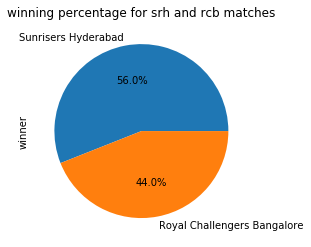

In [9]:
#get matches between srh and rcb
srh_rcb_matches = matches[((matches.team1=='Sunrisers Hyderabad')&(matches.team2=='Royal Challengers Bangalore'))|((matches.team2=='Sunrisers Hyderabad')&(matches.team1=='Royal Challengers Bangalore'))]

#getting wins count
srh_rcb_matches.winner.value_counts().plot(kind='pie', autopct='%1.1f%%', title="winning percentage for srh and rcb matches")

In [10]:
# matches[(matches.team1=='Sunrisers Hyderabad')|(matches.team2=='Sunrisers Hyderabad')].season.unique()
matches[(matches.team1=='Sunrisers Hyderabad')|(matches.team2=='Sunrisers Hyderabad')].season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

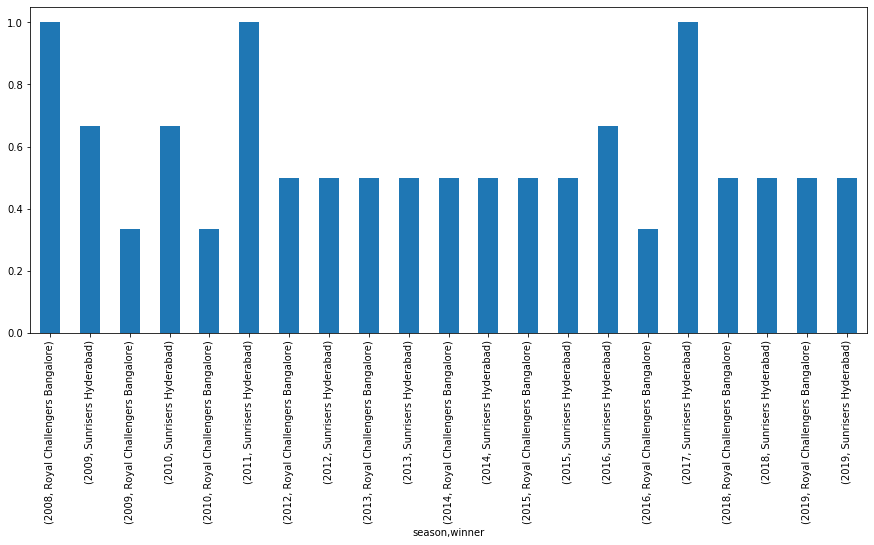

In [11]:
#getting matches between srh nad rcb matchwise
srh_rcb_matches.groupby('season')['winner'].value_counts(normalize=True).plot(kind='bar', figsize=(15,6))

In [12]:
def get_season_winpercent(team_name):
    """
    takes team name as input and returns season wise winning percent
    """

    #count matches played by srh
    get_matches = matches[(matches.team1==team_name)|(matches.team2==team_name)]

    #getting matches played by team per season
    matches_played = get_matches.groupby('season')['id'].count().reset_index()
    matches_played = matches_played.rename(columns={'id': 'tot_matches_played' })

    #getting matches won by team per season
    matches_won = matches[matches.winner==team_name].groupby('season')['id'].count().reset_index()
    matches_won = matches_won.rename(columns={'id': 'tot_matches_won' })

    matches_wins = matches_played.merge(matches_won, on='season')
    matches_wins['winning_percent'] = matches_wins.tot_matches_won/matches_wins.tot_matches_played*100
    return matches_wins[['season', 'winning_percent']]

In [13]:
#get winning percent of srh per season
srh_winp = get_season_winpercent('Sunrisers Hyderabad')

#get winning percent of rcb per season
rcb_winp = get_season_winpercent('Royal Challengers Bangalore')


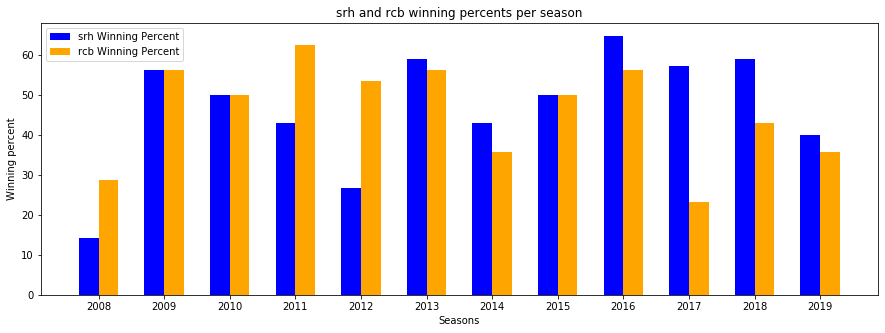

In [14]:
#checking visually
width=0.30
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(srh_winp.season-width/2, srh_winp.winning_percent, width , color='b', label='srh Winning Percent')
ax.bar(rcb_winp.season+width/2, rcb_winp.winning_percent, width,  color='orange', label='rcb Winning Percent')
plt.xlabel("Seasons")
plt.ylabel("Winning percent")
plt.title("srh and rcb winning percents per season")
plt.xticks(np.arange(2008,2020))
plt.legend()
plt.show()

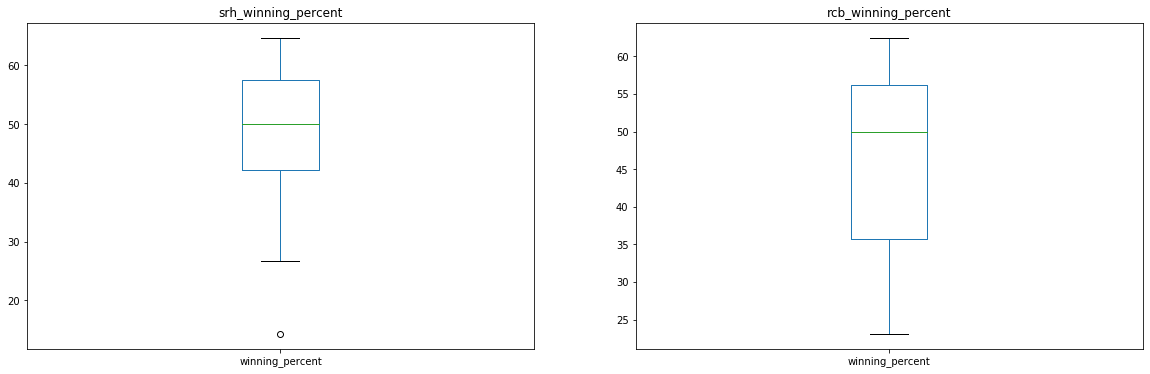

In [15]:
#checking visually
fig, ax = plt.subplots(1,2, figsize=(20,6))
srh_winp.winning_percent.plot('box', ax=ax[0], title='srh_winning_percent')
rcb_winp.winning_percent.plot('box', ax=ax[1], title='rcb_winning_percent')
# plt.yticks(ticks=[0,5,10,15,20,25,30,35,40,45,50,55,60,65]);

**Inference:**
    by checking season wise performance both SRH and RCB seems to have likely simiar winning percentage but in the recent years SRH has become more stronger so more odds of SRH to win.

## 2. What will be Sandeep Sharma's Economy Rate and how many boundaries will he give away in 4 overs

In [61]:
# get all rows when sandeep sharma bowls
ss_bowls = srh_rcb_all[srh_rcb_all.bowler=='Sandeep Sharma']

# get sandeep sharma's economy rate (as checked we have data only for 2 matches with 4 overs each when sandeep sharma bowled)
ss_economy_rate = economy_rate(ss_bowls)

# count how many boundaries sandeep sharma gave away in 4 overs
ss_gave_boundaries = matchwise_bowler_gaveboundaries(ss_bowls)

# merging the two conditions above
ss_result = ss_economy_rate.merge(ss_gave_boundaries, on=['match_id', 'bowler'])

ss_result

,match_id,bowler,total_runs,over,economy_rate,boundary_counts
0,7932,Sandeep Sharma,21,4,5.25,1
1,7944,Sandeep Sharma,41,4,10.25,6


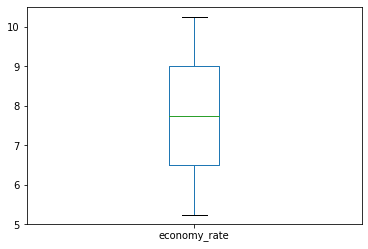

In [62]:
ss_result.economy_rate.plot(kind='box')

**Inference:**
    If we check Sandeep Sharma data as per requiremnt found only 2 matches so not very reliable as in one match economy rate around 5 and in one around but thats also become hegave 6 boundaries . Otherwise its safe to say he will give <4 boundaries and economy rate <=7.5

## 3. How many batsmen in the match, from both the teams, will have a strike rate more than 130 and hit more than 3 boundaries of which, at least two boundaries should be 4's? Only those batsman who play more than 10 balls will be considered. If no batsman has a strike rate above 130 (or) has a SR above 130 but hasn't hit more than 3 boundaries (or) has a SR above 130 and hit more than 3 boundaries but hasnt hit atleast 2 fours (or) hasn't played more than 10 balls, then the first option will be considered as the answer?

In [36]:
# get all players who hit more than 10 balls
srh_rcb_ball10 = matchwise_batsman_strikerate(srh_rcb_all)

#getting all batsman whose strike rate was more than 130
srh_rcb_sr130 = srh_rcb_ball10[srh_rcb_ball10.strike_rate>130]


In [37]:
# get all boundaries as 4 and boundary count of the players
srh_rcb_4s = matchwise_batsman_get4(srh_rcb_all)

#filter only batsman who hit atleast 2 4's
srh_rcb_min2_4s = srh_rcb_4s[srh_rcb_4s.boundary_4_count >= 2]

#mege atleast 2 4's df with all boundary counts df
srh_rcb_boundaries = srh_rcb_4s.merge(matchwise_batsman_boundaries(srh_rcb_all), on=['match_id','batsman'])

#filter rows where boundary count is min 3 
srh_rcb_min3_boundaries = srh_rcb_boundaries[srh_rcb_boundaries.boundary_count >= 3]


In [41]:
# getting all batsman who match all the conditions
srh_rcb_conditions = srh_rcb_sr130.merge(srh_rcb_min3_boundaries, on=['match_id', 'batsman'])

srh_rcb_conditions_met = srh_rcb_conditions.groupby('match_id').count()['batsman']

srh_rcb_conditions_met.describe()

count    25.000000
mean      3.720000
std       1.860108
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max       7.000000
Name: batsman, dtype: float64

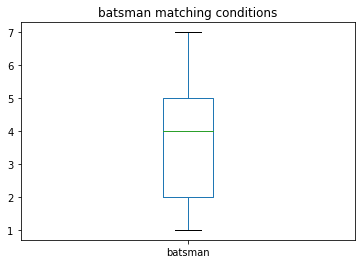

In [42]:
srh_rcb_conditions_met.plot(kind='box', title='batsman matching conditions')

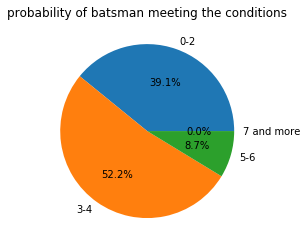

In [40]:
d = {'0-2': np.sum(srh_rcb_powerplay_wickets.wicket_count.isin(range(0,3))),
'3-4': np.sum(srh_rcb_powerplay_wickets.wicket_count.isin(range(3,5))),
'5-6': np.sum(srh_rcb_powerplay_wickets.wicket_count.isin(range(5,7))),
'7 and more': np.sum(srh_rcb_powerplay_wickets.wicket_count>=7)
}

plt.pie(d.values(), autopct='%1.1f%%', labels=d.keys());
plt.title("probability of batsman meeting the conditions");
plt.show()

**Inference:**
    If we check the stats on average we have around 3-4 batsman matching the condition. also by checking the probability we can say highest odds are of having 3-4 batsman.

## 4. Which batsman will have the highest (# of runs scored through boundaries) to (total runs scored) ration in the match? 

Consider only those players who play more than 10 balls. If 2 players end up with the same ratio then the batsman with a higher strike rate will be chosen. If this also remains same for 2 batsman, then the one who scores more 6s off the bowler with a lesser economy rate will be selected as the answer. Even if this turns out to be the same, then other metrics and tie breakers will be considered and the answer decided by Widhya will be "FINAL". 

In [43]:
#get batsman who player more than 10 balls atleast
batsman_atleast_10ball = matchwise_batsman_ballsplayed(srh_rcb_all)[matchwise_batsman_ballsplayed(srh_rcb_all).ball>10]

# get ratio : (# of runs scored through boundaries) to (total runs scored) ration in the match
result = matchwise_batsman_boundaries(srh_rcb_all).merge(matchwise_batsman_totalruns(srh_rcb_all), on=['match_id', 'batsman'], suffixes=['_boundaries', '_total']).merge(batsman_atleast_10ball, on=['match_id', 'batsman'])

# get required ratio
result['ratio'] = result['total_boundary_runs']/result['batsman_runs']

#adding strike rate to result df
result = result.merge(matchwise_batsman_strikerate(srh_rcb_all), on=['match_id', 'batsman'])

# get person who scored highest per match

s_samson_count = []
kl_rahul_counts = []
c_gayle_count = []
s_smith = []
r_uthappa = []
j_butler = []
others = []
counts = {}



d = result.groupby('batsman').median().sort_values(['ratio','strike_rate'])

d.head(20)

,match_id,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,ratio,batsman_runs_y,ball_y,strike_rate
batsman,,,,,,,,,
GH Vihari,388.0,8.0,2.0,44.0,47.0,0.181818,44.0,47.0,93.6170
RR Rossouw,481.0,4.0,1.0,14.0,23.0,0.285714,14.0,23.0,60.8700
KC Sangakkara,382.0,6.0,1.5,19.5,23.5,0.307246,19.5,23.5,94.9755
SS Tiwary,376.0,10.0,2.0,30.0,27.0,0.333333,30.0,27.0,111.1110
RV Uthappa,174.0,6.0,1.0,17.0,20.0,0.352941,17.0,20.0,113.3330
EJG Morgan,580.0,8.0,2.0,22.0,18.0,0.363636,22.0,18.0,122.2220
DJ Hooda,1.0,6.0,1.0,16.0,12.0,0.375000,16.0,12.0,133.3330
P R Barman,11147.0,8.0,2.0,20.0,25.0,0.400000,20.0,25.0,80.0000
TL Suman,174.0,4.0,1.0,12.0,12.0,0.400000,12.0,12.0,100.0000


In [44]:
#get batsman who player more than 10 balls atleast
batsman_atleast_10ball = matchwise_batsman_ballsplayed(srh_rcb_all)[matchwise_batsman_ballsplayed(srh_rcb_all).ball>10]

# get ratio : (# of runs scored through boundaries) to (total runs scored) ration in the match
result = matchwise_batsman_boundaries(srh_rcb_all).merge(matchwise_batsman_totalruns(srh_rcb_all), on=['match_id', 'batsman'], suffixes=['_boundaries', '_total']).merge(batsman_atleast_10ball, on=['match_id', 'batsman']).merge(matchwise_batsman_scored123(srh_rcb_all), on=['match_id', 'batsman'])

# # get required ratio
result['ratio'] = (result['total_boundary_runs'] - result['total_scored123_runs'])/result['batsman_runs']

# filtering rows where batsman play more than 10 balls
result = result.merge(matchwise_batsman_strikerate(srh_rcb_all), on=['match_id', 'batsman'])

In [45]:
players = {}

for id in result.match_id.unique():
    df1 = result[result.match_id==id].sort_values(by=['ratio', 'strike_rate'], ascending=False)
    display(df1)

,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
4,1,Mandeep Singh,20,5,24,16,4,3,0.666667,24,16,150.000
0,1,CH Gayle,26,5,32,23,6,5,0.625000,32,23,139.130
8,1,Yuvraj Singh,46,10,62,30,16,13,0.483871,62,30,206.667
2,1,KM Jadhav,22,5,31,18,9,9,0.419355,31,18,172.222
5,1,S Dhawan,20,5,40,31,20,19,0.000000,40,31,129.032
3,1,MC Henriques,24,5,52,37,28,23,-0.076923,52,37,140.541
6,1,SR Watson,10,2,22,17,12,10,-0.090909,22,17,129.412
7,1,TM Head,12,3,30,22,18,15,-0.200000,30,22,136.364
1,1,DJ Hooda,6,1,16,12,10,9,-0.250000,16,12,133.333


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
12,80,JH Kallis,24,6,31,25,7,6,0.548387,31,25,124.000
16,80,Y Venugopal Rao,20,4,26,12,6,6,0.538462,26,12,216.667
11,80,HH Gibbs,36,8,47,36,11,10,0.531915,47,36,130.556
13,80,Misbah-ul-Haq,22,5,34,28,12,10,0.294118,34,28,121.429
9,80,AC Gilchrist,28,6,46,38,18,17,0.217391,46,38,121.053
14,80,R Dravid,18,4,31,21,13,13,0.161290,31,21,147.619
10,80,CL White,16,3,31,23,15,15,0.032258,31,23,134.783
15,80,RG Sharma,8,2,17,17,9,7,-0.058824,17,17,100.000


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
17,111,AC Gilchrist,8,2,10,12,2,2,0.600000,10,12,83.333
20,111,RG Sharma,38,8,57,43,19,19,0.333333,57,43,132.558
19,111,R Dravid,16,3,26,19,10,10,0.230769,26,19,136.842
23,111,W Jaffer,24,6,44,37,20,18,0.090909,44,37,118.919
22,111,VVS Laxman,28,7,52,44,24,23,0.076923,52,44,118.182
18,111,MV Boucher,8,2,16,14,8,8,0.000000,16,14,114.286
21,111,V Kohli,16,3,38,31,22,21,-0.157895,38,31,122.581


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
25,124,JH Kallis,12,3,15,14,3,3,0.600000,15,14,107.143
24,124,AC Gilchrist,54,11,71,45,17,16,0.521127,71,45,157.778
27,124,R Dravid,32,7,48,27,16,13,0.333333,48,27,177.778
28,124,RG Sharma,34,6,52,31,18,14,0.307692,52,31,167.742
30,124,V Kohli,28,7,50,35,22,15,0.120000,50,35,142.857
26,124,KP Pietersen,4,1,11,17,7,6,-0.272727,11,17,64.706
29,124,RV Uthappa,4,1,12,20,8,8,-0.333333,12,20,60.000


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
35,171,RE van der Merwe,18,4,23,18,5,4,0.565217,23,18,127.778
33,171,HH Gibbs,36,7,60,46,24,21,0.200000,60,46,130.435
34,171,MK Pandey,64,14,114,74,50,36,0.122807,114,74,154.054
31,171,A Symonds,10,2,18,17,8,7,0.111111,18,17,105.882
32,171,AC Gilchrist,8,2,15,19,7,6,0.066667,15,19,78.947
36,171,RG Sharma,4,1,12,12,8,8,-0.333333,12,12,100.000
37,171,TL Suman,4,1,12,12,8,7,-0.333333,12,12,100.000


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
40,174,JH Kallis,12,3,15,17,3,2,0.600000,15,17,88.235
42,174,RE van der Merwe,22,4,32,21,10,6,0.375000,32,21,152.381
38,174,A Symonds,22,5,33,21,11,8,0.333333,33,21,157.143
41,174,LRPL Taylor,18,4,27,20,9,8,0.333333,27,20,135.000
39,174,HH Gibbs,24,5,53,51,29,24,-0.094340,53,51,103.922
43,174,RG Sharma,10,2,24,24,14,12,-0.166667,24,24,100.000
45,174,TL Suman,4,1,10,12,6,4,-0.200000,10,12,83.333
44,174,RV Uthappa,6,1,17,15,11,9,-0.294118,17,15,113.333


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
49,214,MD Mishra,8,2,9,11,1,1,0.777778,9,11,81.818
47,214,AC Gilchrist,24,5,32,21,8,8,0.500000,32,21,152.381
46,214,A Symonds,38,8,53,25,15,14,0.433962,53,25,212.000
52,214,V Kohli,40,8,58,37,18,15,0.379310,58,37,156.757
48,214,JH Kallis,42,10,68,49,21,19,0.308824,68,49,138.776
51,214,TL Suman,42,9,78,59,36,30,0.076923,78,59,132.203
50,214,R Dravid,14,3,26,26,12,10,0.076923,26,26,100.000


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
56,220,R Dravid,32,8,49,36,17,14,0.306122,49,36,136.111
57,220,RG Sharma,28,7,51,47,23,20,0.098039,51,47,108.511
55,220,MD Mishra,22,4,41,31,19,16,0.073171,41,31,132.258
58,220,RV Uthappa,18,3,34,22,16,14,0.058824,34,22,154.545
53,220,A Symonds,8,2,19,21,11,10,-0.157895,19,21,90.476
54,220,JH Kallis,4,1,27,40,23,21,-0.703704,27,40,67.500


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
60,233,JH Kallis,12,3,19,33,7,6,0.263158,19,33,57.576
63,233,Y Venugopal Rao,14,3,24,27,10,10,0.166667,24,27,88.889
62,233,R Dravid,20,5,35,30,15,15,0.142857,35,30,116.667
61,233,KP Pietersen,16,3,29,21,13,12,0.103448,29,21,138.095
59,233,Anirudh Singh,22,5,40,42,18,16,0.100000,40,42,95.238


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
69,245,S Sohal,26,6,38,39,12,10,0.368421,38,39,97.436
65,245,CA Pujara,16,4,25,15,9,8,0.280000,25,15,166.667
66,245,JP Duminy,14,3,22,15,8,6,0.272727,22,15,146.667
64,245,B Chipli,38,8,61,35,23,21,0.245902,61,35,174.286
70,245,V Kohli,38,8,71,51,33,24,0.070423,71,51,139.216
67,245,KC Sangakkara,18,4,36,25,18,16,0.000000,36,25,144.000
68,245,MA Agarwal,8,2,16,13,8,6,0.000000,16,13,123.077


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
71,356,AB de Villiers,38,8,47,17,9,8,0.617021,47,17,276.471
74,356,DJ Harris,32,6,47,42,15,15,0.361702,47,42,111.905
75,356,S Dhawan,46,11,73,53,27,25,0.260274,73,53,137.736
76,356,TM Dilshan,44,10,71,56,27,22,0.239437,71,56,126.786
72,356,CH Gayle,16,3,26,23,10,10,0.230769,26,23,113.043
73,356,CL White,26,5,45,25,19,14,0.155556,45,25,180.000


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
77,376,JP Duminy,46,9,74,53,28,24,0.243243,74,53,139.623
81,376,V Kohli,26,5,42,41,16,15,0.238095,42,41,102.439
80,376,SS Tiwary,10,2,30,27,20,16,-0.333333,30,27,111.111
78,376,KC Sangakkara,4,1,15,23,11,11,-0.466667,15,23,65.217
79,376,PA Patel,4,1,16,22,12,11,-0.500000,16,22,72.727


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
83,388,CL White,16,3,22,16,6,4,0.454545,22,16,137.500
89,388,V Kohli,30,7,51,47,21,19,0.176471,51,47,108.511
86,388,MC Henriques,20,5,44,40,24,21,-0.090909,44,40,110.000
87,388,NLTC Perera,4,1,9,11,5,5,-0.111111,9,11,81.818
82,388,A Ashish Reddy,6,1,14,12,8,7,-0.142857,14,12,116.667
88,388,PA Reddy,8,2,23,22,15,14,-0.304348,23,22,104.545
85,388,KC Sangakkara,4,1,16,17,12,10,-0.500000,16,17,94.118
84,388,GH Vihari,8,2,44,47,36,31,-0.636364,44,47,93.617


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
94,432,MA Agarwal,24,5,29,20,5,4,0.655172,29,20,145.000
98,432,V Kohli,68,15,93,51,25,20,0.462366,93,51,182.353
95,432,NLTC Perera,28,5,40,27,12,11,0.400000,40,27,148.148
97,432,PA Reddy,8,2,12,11,4,3,0.333333,12,11,109.091
91,432,CH Gayle,8,2,13,15,5,4,0.230769,13,15,86.667
92,432,CL White,30,6,52,35,22,19,0.153846,52,35,148.571
96,432,PA Patel,8,2,20,19,12,10,-0.200000,20,19,105.263
90,432,AB de Villiers,6,1,15,15,9,8,-0.200000,15,15,100.000
93,432,KC Sangakkara,8,2,23,24,15,14,-0.304348,23,24,95.833


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
100,481,CH Gayle,24,5,27,20,3,3,0.777778,27,20,135.000
99,481,AB de Villiers,72,14,89,43,17,16,0.617978,89,43,206.977
105,481,Yuvraj Singh,10,2,14,16,4,4,0.428571,14,16,87.500
102,481,NV Ojha,10,2,15,12,5,4,0.333333,15,12,125.000
101,481,DA Warner,34,7,61,51,27,24,0.114754,61,51,119.608
104,481,S Dhawan,16,4,37,38,21,18,-0.135135,37,38,97.368
103,481,RR Rossouw,4,1,14,23,10,8,-0.428571,14,23,60.870


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
110,503,S Dhawan,34,8,50,39,16,13,0.360000,50,39,128.205
112,503,Yuvraj Singh,14,3,21,25,7,7,0.333333,21,25,84.000
108,503,DA Warner,36,7,59,47,23,19,0.220339,59,47,125.532
111,503,V Kohli,40,8,67,43,27,24,0.194030,67,43,155.814
109,503,NV Ojha,12,2,24,22,12,11,0.000000,24,22,109.091
106,503,AB de Villiers,14,3,29,18,15,12,-0.034483,29,18,161.111
107,503,CH Gayle,4,1,14,20,10,7,-0.428571,14,20,70.000


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
114,525,CH Gayle,18,4,21,16,3,2,0.714286,21,16,131.250
115,525,DA Warner,48,10,57,28,9,8,0.684211,57,28,203.571
113,525,AB de Villiers,32,7,46,29,14,12,0.391304,46,29,158.621
119,525,V Kohli,28,6,41,42,13,12,0.365854,41,42,97.619
118,525,S Dhawan,28,6,50,42,22,22,0.120000,50,42,119.048
117,525,KL Rahul,22,5,44,32,22,19,0.000000,44,32,137.500
116,525,KD Karthik,4,1,9,11,5,5,-0.111111,9,11,81.818


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
120,568,CH Gayle,34,7,35,11,1,1,0.942857,35,11,318.182
122,568,MC Henriques,44,9,57,24,13,10,0.543860,57,24,237.500
123,568,V Kohli,30,6,44,19,14,9,0.363636,44,19,231.579
121,568,DA Warner,26,6,52,32,26,21,0.000000,52,32,162.500


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
124,580,A Ashish Reddy,26,5,32,18,6,6,0.625000,32,18,177.778
126,580,DA Warner,46,9,58,26,12,9,0.586207,58,26,223.077
125,580,AB de Villiers,64,13,82,44,18,18,0.560976,82,44,186.364
128,580,KV Sharma,18,4,26,18,8,5,0.384615,26,18,144.444
130,580,V Kohli,46,10,75,51,29,24,0.226667,75,51,147.059
129,580,MC Henriques,8,2,19,24,11,10,-0.157895,19,24,79.167
127,580,EJG Morgan,8,2,22,18,14,11,-0.272727,22,18,122.222


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
137,603,S Dhawan,8,2,11,11,3,3,0.454545,11,11,100.000
132,603,DA Warner,66,14,92,52,26,21,0.434783,92,52,176.923
136,603,MC Henriques,22,4,31,14,9,8,0.419355,31,14,221.429
138,603,Sachin Baby,18,4,27,16,9,8,0.333333,27,16,168.750
133,603,KL Rahul,30,7,51,29,21,17,0.176471,51,29,175.862
135,603,KS Williamson,28,7,50,38,22,20,0.120000,50,38,131.579
131,603,AB de Villiers,24,5,47,33,23,18,0.021277,47,33,142.424
134,603,KM Jadhav,12,2,25,15,13,9,-0.040000,25,15,166.667
139,603,V Kohli,4,1,14,17,10,10,-0.428571,14,17,82.353


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
140,636,BCJ Cutting,36,7,39,18,3,3,0.846154,39,18,216.667
141,636,CH Gayle,64,12,76,41,12,10,0.684211,76,41,185.366
145,636,Yuvraj Singh,28,6,38,24,10,10,0.473684,38,24,158.333
142,636,DA Warner,50,11,69,39,19,18,0.449275,69,39,176.923
143,636,S Dhawan,18,4,28,26,10,9,0.285714,28,26,107.692
144,636,V Kohli,32,7,54,36,22,17,0.185185,54,36,150.000


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
149,7932,PA Patel,16,4,20,13,4,3,0.600000,20,13,153.846
152,7932,V Kohli,26,6,39,30,13,12,0.333333,39,30,130.000
147,7932,KS Williamson,32,7,59,41,27,25,0.084746,59,41,143.902
151,7932,Shakib Al Hasan,20,5,37,34,17,16,0.081081,37,34,108.824
146,7932,C de Grandhomme,16,3,34,30,18,17,-0.058824,34,30,113.333
150,7932,S Dhawan,4,1,14,20,10,10,-0.428571,14,20,70.000
148,7932,Mandeep Singh,4,1,23,23,19,16,-0.652174,23,23,100.000


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
154,7944,AB de Villiers,54,13,71,41,17,16,0.521127,71,41,173.171
156,7944,KS Williamson,58,12,82,42,24,22,0.414634,82,42,195.238
153,7944,A Hales,26,5,37,24,11,10,0.405405,37,24,154.167
155,7944,C de Grandhomme,28,5,41,17,13,9,0.365854,41,17,241.176
157,7944,M Ali,44,8,65,34,21,19,0.353846,65,34,191.176
159,7944,S Dhawan,12,2,18,15,6,6,0.333333,18,15,120.000
160,7944,V Kohli,8,2,12,11,4,4,0.333333,12,11,109.091
158,7944,MK Pandey,40,9,66,41,26,22,0.212121,66,41,160.976


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
163,11147,J Bairstow,90,19,115,57,25,22,0.565217,115,57,201.754
161,11147,C de Grandhomme,24,5,37,32,13,12,0.297297,37,32,115.625
162,11147,DA Warner,50,10,101,55,51,38,-0.009901,101,55,183.636
164,11147,P R Barman,8,2,20,25,12,12,-0.200000,20,25,80.000


,match_id,batsman,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
171,11345,WP Saha,16,4,21,11,5,5,0.523810,21,11,190.909
167,11345,MJ Guptill,20,4,30,23,5,5,0.500000,30,23,130.435
169,11345,S Hetmyer,52,10,78,50,26,26,0.333333,78,50,156.000
170,11345,V Shankar,18,3,27,18,9,8,0.333333,27,18,150.000
166,11345,KS Williamson,44,9,72,44,28,25,0.222222,72,44,163.636
165,11345,Gurkeerat Singh,38,9,69,50,31,30,0.101449,69,50,138.000
168,11345,MK Pandey,4,1,9,12,5,5,-0.111111,9,12,75.000


In [46]:
l = result.batsman.unique().tolist()
players = {i : l.count(i) for i in l  }
result['batsman']

0             CH Gayle
1             DJ Hooda
2            KM Jadhav
3         MC Henriques
4        Mandeep Singh
5             S Dhawan
6            SR Watson
7              TM Head
8         Yuvraj Singh
9         AC Gilchrist
10            CL White
11            HH Gibbs
12           JH Kallis
13       Misbah-ul-Haq
14            R Dravid
15           RG Sharma
16     Y Venugopal Rao
17        AC Gilchrist
18          MV Boucher
19            R Dravid
20           RG Sharma
21             V Kohli
22          VVS Laxman
23            W Jaffer
24        AC Gilchrist
25           JH Kallis
26        KP Pietersen
27            R Dravid
28           RG Sharma
29          RV Uthappa
            ...       
142          DA Warner
143           S Dhawan
144            V Kohli
145       Yuvraj Singh
146    C de Grandhomme
147      KS Williamson
148      Mandeep Singh
149           PA Patel
150           S Dhawan
151    Shakib Al Hasan
152            V Kohli
153            A Hales
154     AB 

In [47]:
result.groupby('batsman').count().sort_values(by='match_id', ascending=False)

,match_id,total_boundary_runs,boundary_count,batsman_runs_x,ball_x,total_scored123_runs,scored123_count,ratio,batsman_runs_y,ball_y,strike_rate
batsman,,,,,,,,,,,
V Kohli,15,15,15,15,15,15,15,15,15,15,15
S Dhawan,9,9,9,9,9,9,9,9,9,9,9
DA Warner,8,8,8,8,8,8,8,8,8,8,8
AB de Villiers,8,8,8,8,8,8,8,8,8,8,8
CH Gayle,8,8,8,8,8,8,8,8,8,8,8
RG Sharma,6,6,6,6,6,6,6,6,6,6,6
JH Kallis,6,6,6,6,6,6,6,6,6,6,6
R Dravid,6,6,6,6,6,6,6,6,6,6,6
MC Henriques,5,5,5,5,5,5,5,5,5,5,5


In [ ]:
**Inference:**
    If we check the batsman whose conditions met and check their average its likely that Virat Kohli might be right chice

## 5. How many wickets totally will both the teams lose during the powerplay?

    * 0-1
    * 2
    * 3-4
    * 5 or more

In [17]:
#get all matches between srh and rcb
srh_rcb_all = deliveries[((deliveries.bowling_team=='Sunrisers Hyderabad')&(deliveries.batting_team=='Royal Challengers Bangalore'))|((deliveries.bowling_team=='Royal Challengers Bangalore')&(deliveries.batting_team=='Sunrisers Hyderabad'))]

In [18]:
# getting rows of powerplay foe rach match
srh_rcb_powerplay = srh_rcb_all[srh_rcb_all.over.isin(range(1,7))]

# get total wicketrs by both teams 
srh_rcb_powerplay_wickets = matchwise_wickets_total(srh_rcb_powerplay)

# checking basic wicket_count stat
srh_rcb_powerplay_wickets['wicket_count'].describe()

count    23.000000
mean      2.869565
std       1.179536
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: wicket_count, dtype: float64

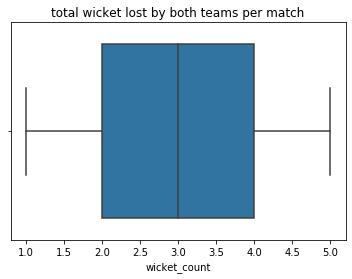

In [19]:
plt.title("total wicket lost by both teams per match")
sns.boxplot(srh_rcb_powerplay_wickets.wicket_count)
# plt.xlabel(orient=90)
plt.show()

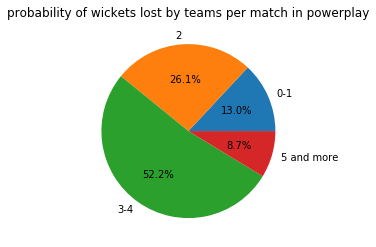

In [22]:
d = {'0-1': np.sum(srh_rcb_powerplay_wickets.wicket_count.isin(range(0,2))),
'2': np.sum(srh_rcb_powerplay_wickets.wicket_count.isin([2])),
'3-4': np.sum(srh_rcb_powerplay_wickets.wicket_count.isin(range(3,5))),
'5 and more': np.sum(srh_rcb_powerplay_wickets.wicket_count>=5)
}

plt.pie(d.values(), autopct='%1.1f%%', labels=d.keys());
plt.title("probability of wickets lost by teams per match in powerplay");
plt.show()

**Inference:**
    If we check on average teams will loose 3 wickets on average also if we check probability we have 52.2% odds indicating 2-3 wickets during powerplay will be lost